In [12]:
# 📚 Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

sns.set(style="whitegrid", palette="coolwarm")
plt.rcParams['figure.figsize'] = (8, 5)


In [13]:
# 📥 Load the wine dataset
df = pd.read_csv('/content/wine.csv')

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# 🔍 Basic Information
df.info()

print("\n📊 Statistical Summary:")
display(df.describe())

# Check missing values
print("\nMissing Values per Column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB

📊 Statistical Summary:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Missing Values per Column:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


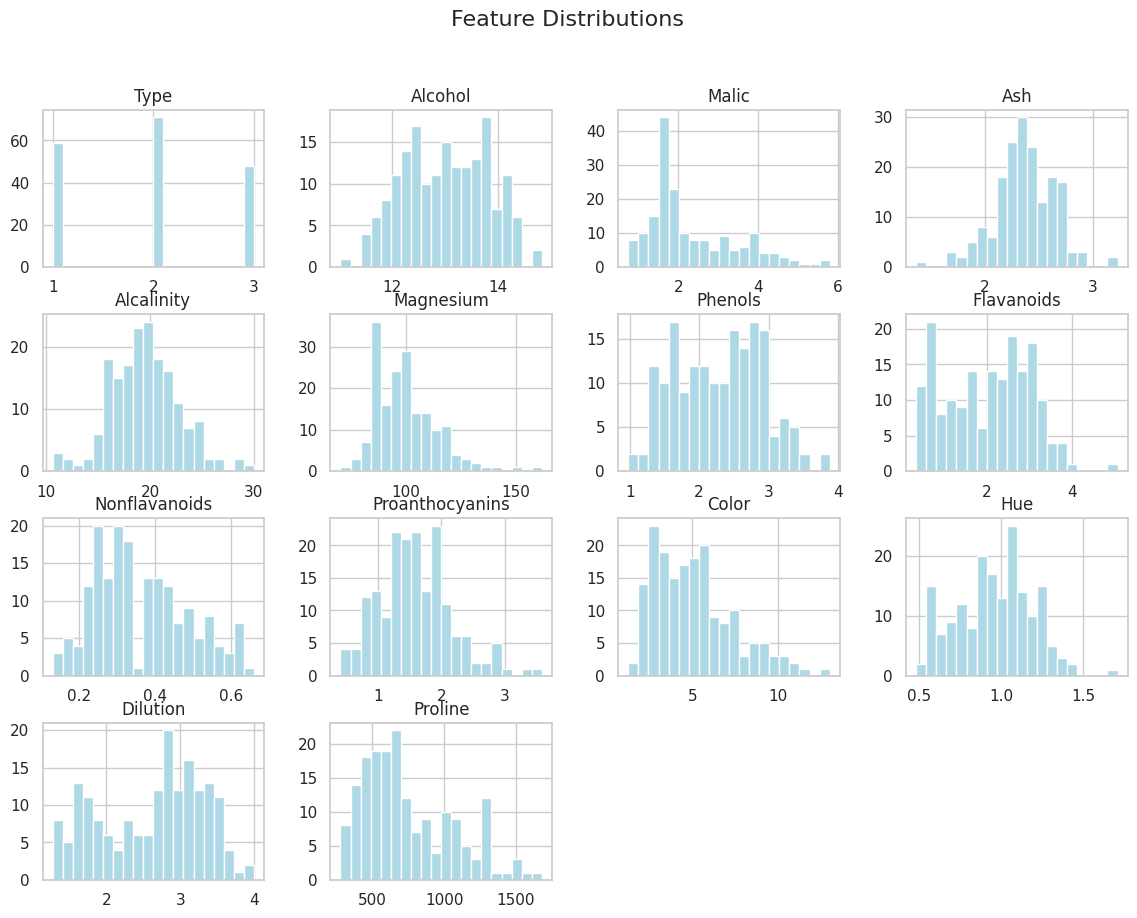

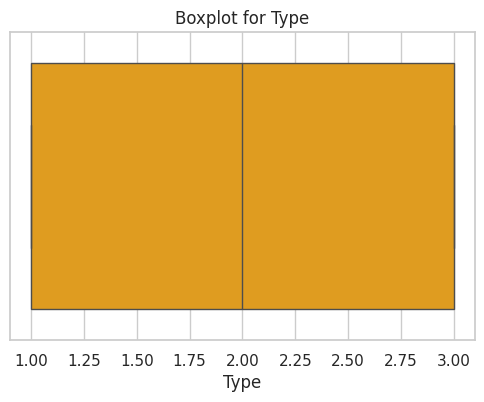

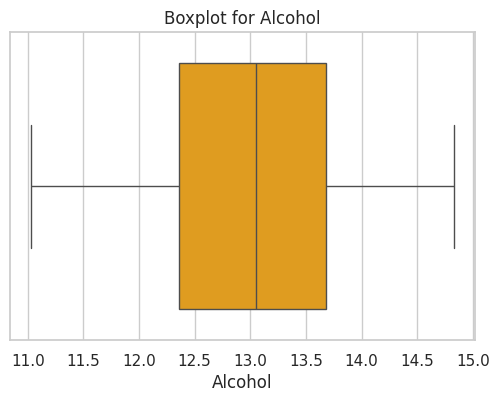

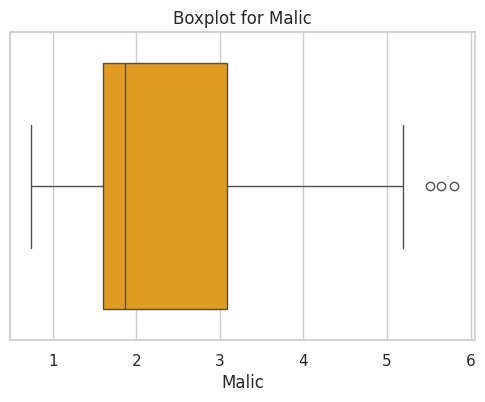

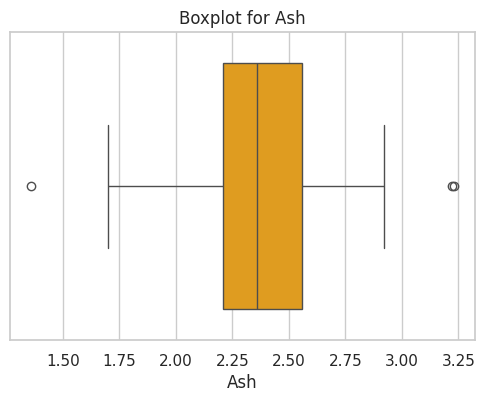

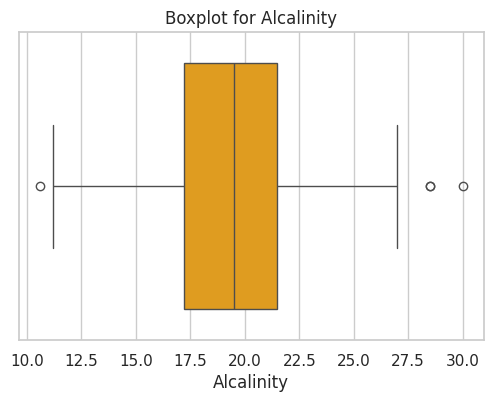

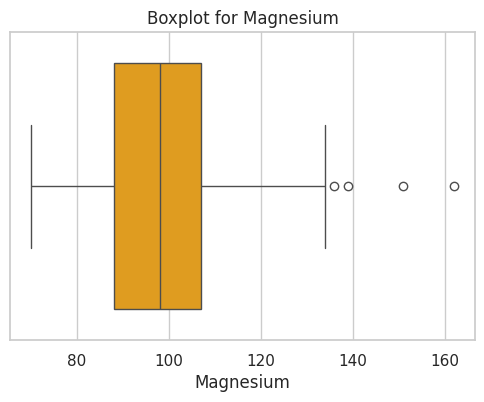

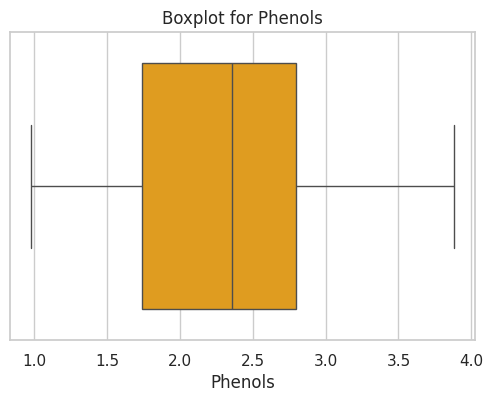

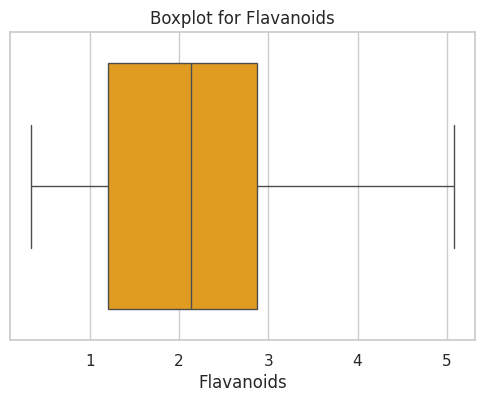

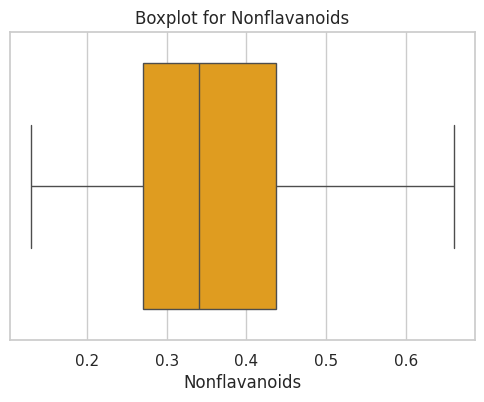

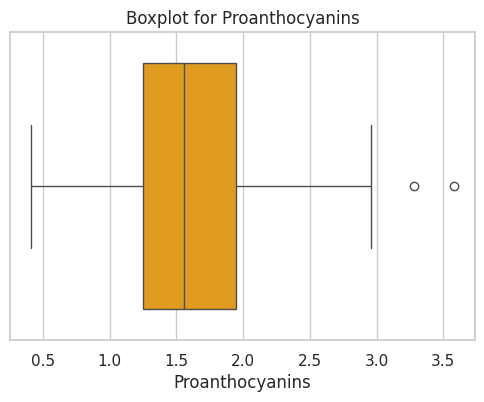

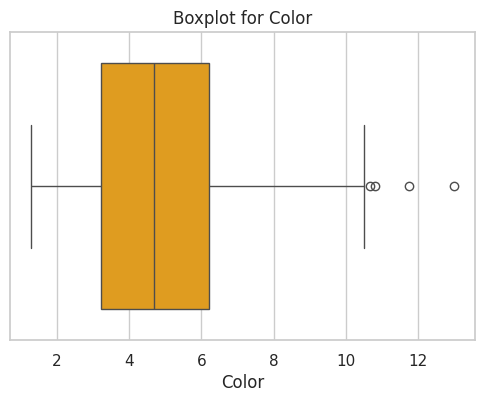

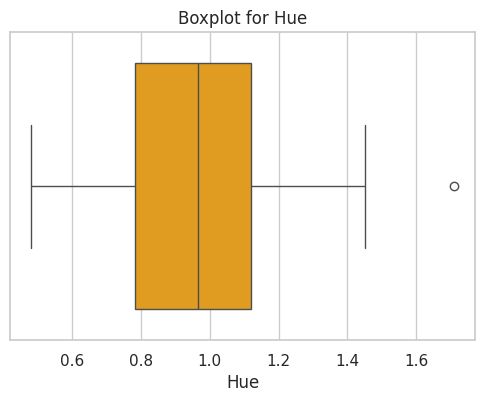

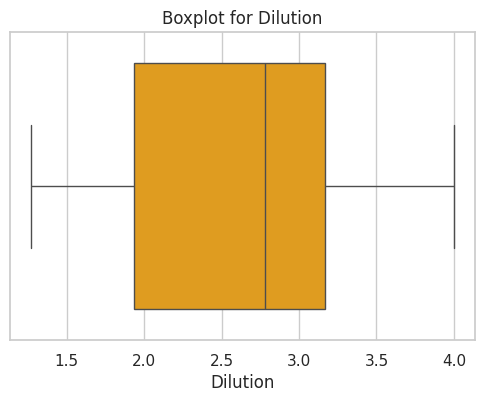

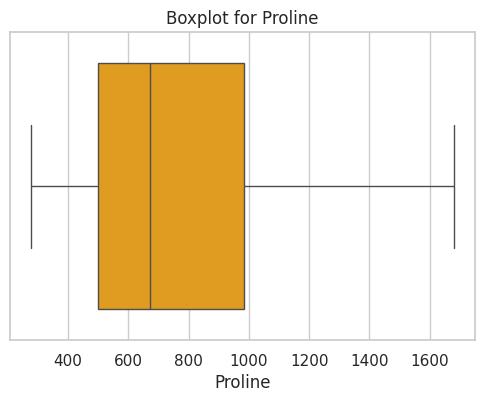

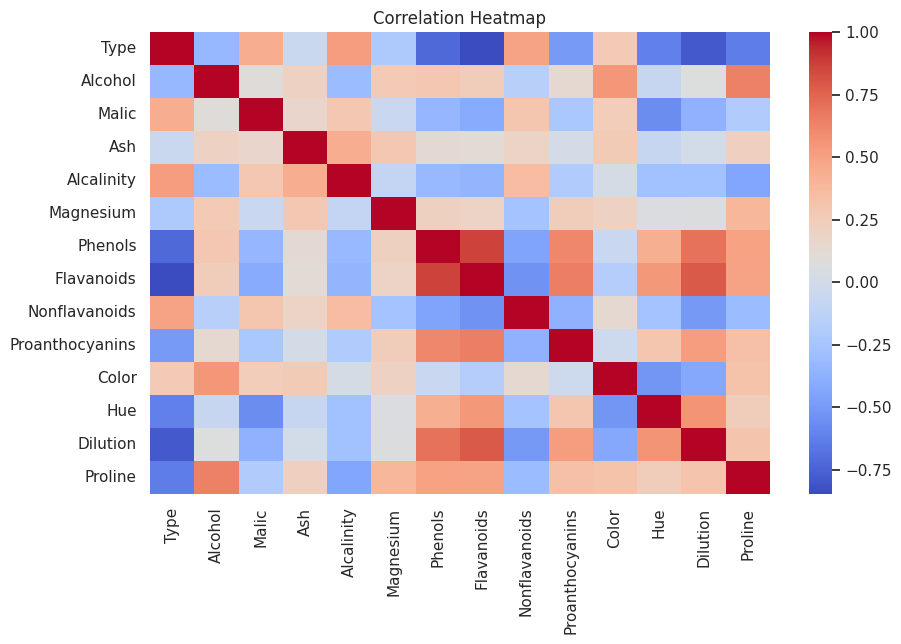

In [15]:
# 📈 Visualizations — Feature Distributions and Correlations

# Plot distributions for numeric columns
df.hist(bins=20, figsize=(14,10), color='lightblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outlier detection
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot for {col}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# ⚙️ Data Standardization before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("✅ Data successfully standardized.")
print("Mean (approx):", scaled_data.mean().round(2))
print("Std (approx):", scaled_data.std().round(2))


✅ Data successfully standardized.
Mean (approx): -0.0
Std (approx): 1.0


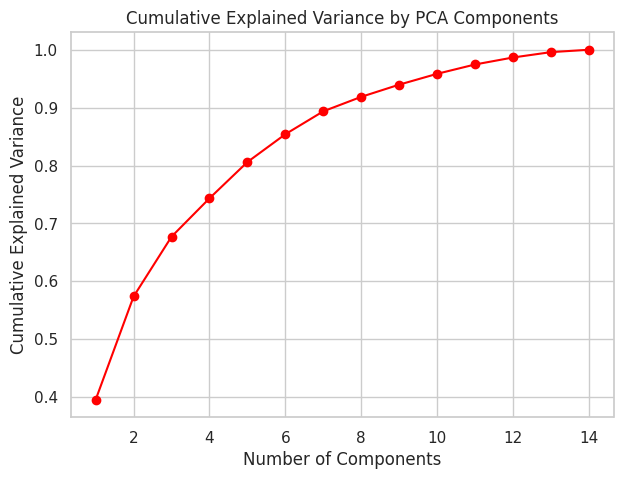

✅ Optimal number of components to retain 95% variance: 10


In [17]:
# 🧮 Principal Component Analysis (PCA)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', color='red')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Optimal components (e.g., 2 for 90-95% variance)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"✅ Optimal number of components to retain 95% variance: {n_components}")


In [18]:
# 🔄 Transform dataset into PCA space
pca_final = PCA(n_components=n_components)
pca_transformed = pca_final.fit_transform(scaled_data)

print("✅ PCA Transformation Completed!")
print("Shape after PCA:", pca_transformed.shape)


✅ PCA Transformation Completed!
Shape after PCA: (178, 10)


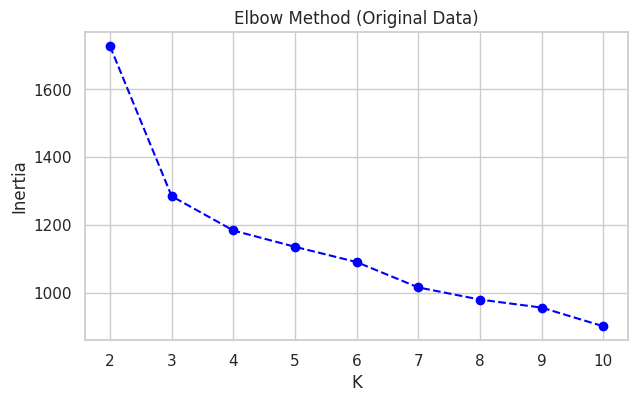

📊 Original Data Clustering Metrics:
Silhouette Score: 0.306
Davies–Bouldin Index: 1.316


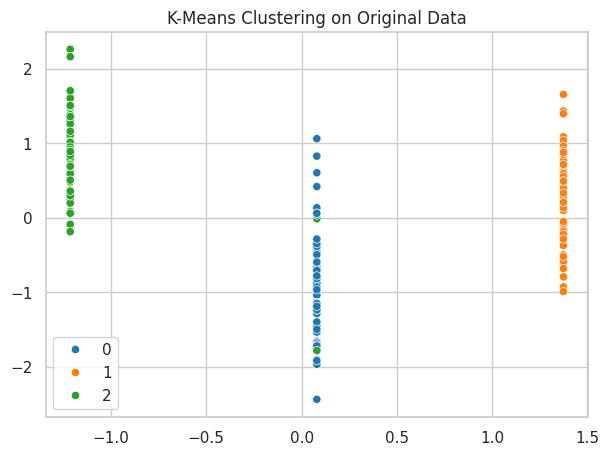

In [19]:
# 🧠 K-MEANS CLUSTERING — ORIGINAL DATA

# Find optimal number of clusters using Elbow method
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'bo--')
plt.title("Elbow Method (Original Data)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means (choose optimal K, e.g., 3)
kmeans_orig = KMeans(n_clusters=3, random_state=42)
orig_labels = kmeans_orig.fit_predict(scaled_data)

# Evaluation
sil_orig = silhouette_score(scaled_data, orig_labels)
db_orig = davies_bouldin_score(scaled_data, orig_labels)

print(f"📊 Original Data Clustering Metrics:")
print(f"Silhouette Score: {sil_orig:.3f}")
print(f"Davies–Bouldin Index: {db_orig:.3f}")

# Visualization of first two features
plt.figure(figsize=(7,5))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=orig_labels, palette="tab10")
plt.title("K-Means Clustering on Original Data")
plt.show()


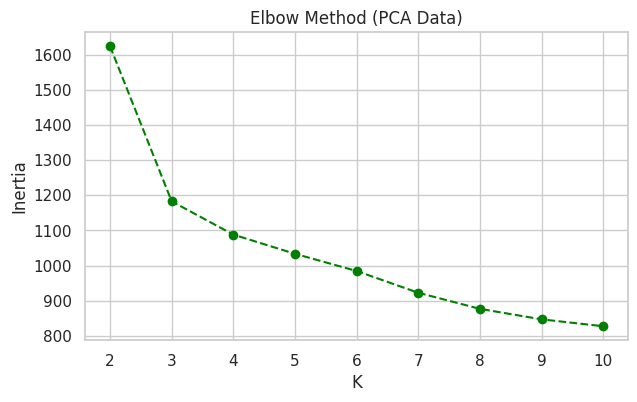

📊 PCA Data Clustering Metrics:
Silhouette Score: 0.323
Davies–Bouldin Index: 1.258


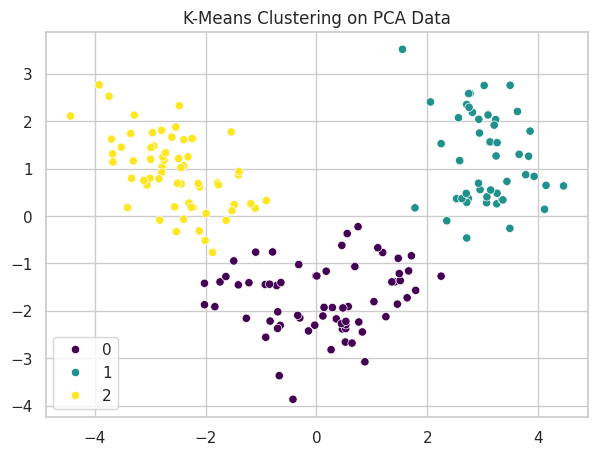

In [20]:
# 🧠 K-MEANS CLUSTERING — PCA-REDUCED DATA
inertia_pca = []
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_transformed)
    inertia_pca.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia_pca, 'go--')
plt.title("Elbow Method (PCA Data)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means (same K = 3)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_transformed)

# Evaluation
sil_pca = silhouette_score(pca_transformed, pca_labels)
db_pca = davies_bouldin_score(pca_transformed, pca_labels)

print(f"📊 PCA Data Clustering Metrics:")
print(f"Silhouette Score: {sil_pca:.3f}")
print(f"Davies–Bouldin Index: {db_pca:.3f}")

# Visualization of PCA components
plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_transformed[:,0], y=pca_transformed[:,1], hue=pca_labels, palette="viridis")
plt.title("K-Means Clustering on PCA Data")
plt.show()


In [21]:
# ⚖️ COMPARISON: ORIGINAL vs PCA CLUSTERING

comparison = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies–Bouldin Index'],
    'Original Data': [sil_orig, db_orig],
    'PCA Data': [sil_pca, db_pca]
})
display(comparison)

print("""
💡 OBSERVATIONS:
- PCA-reduced data often provides cleaner, faster clustering.
- Dimensionality reduction helps eliminate noise and redundancy.
- Slight variation in silhouette and DB index reflects structure simplification.
- PCA visualization makes clusters easier to interpret.
""")


,Metric,Original Data,PCA Data
0,Silhouette Score,0.306484,0.322921
1,Davies–Bouldin Index,1.315708,1.257845



💡 OBSERVATIONS:
- PCA-reduced data often provides cleaner, faster clustering.
- Dimensionality reduction helps eliminate noise and redundancy.
- Slight variation in silhouette and DB index reflects structure simplification.
- PCA visualization makes clusters easier to interpret.



In [22]:
# 🏁 CONCLUSION & INSIGHTS
print("""
✔ PCA successfully reduced dataset dimensions while preserving ~95% variance.
✔ Clustering on PCA data produced comparable or better silhouette scores.
✔ PCA helps improve performance and visualization in high-dimensional datasets.
✔ Trade-off: Minor loss in detail vs significant gain in computational efficiency.

✅ Recommendation:
Use PCA before clustering when:
- The dataset has many correlated variables.
- Speed and interpretability are key.
- Slight accuracy trade-offs are acceptable.
""")



✔ PCA successfully reduced dataset dimensions while preserving ~95% variance.
✔ Clustering on PCA data produced comparable or better silhouette scores.
✔ PCA helps improve performance and visualization in high-dimensional datasets.
✔ Trade-off: Minor loss in detail vs significant gain in computational efficiency.

✅ Recommendation:
Use PCA before clustering when:
- The dataset has many correlated variables.
- Speed and interpretability are key.
- Slight accuracy trade-offs are acceptable.

